<a href="https://colab.research.google.com/github/harithagb/timeseries/blob/main/econ_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt


# Energy Consumption

In [ ]:
energy = pd.read_excel('CombustibleFuelsConsumption.xlsx', sheet_name = 'Monthly Data')

In [ ]:
energy.rename(columns = {'Coal Consumption for Electricity Generation and Useful Thermal Output, All Sectors':'Coal',
                         'Distillate Fuel Oil Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'DistillateOil',
                         'Residual Fuel Oil Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'ResidualOil',
                         'Other Petroleum Liquids Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'OtherPetroleumLiq',
                         'Petroleum Coke Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'PetroleumCoke',
                         'Total Petroleum Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'TotalPetrolConsumption',
                         'Natural Gas Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'NatGasConsumption',
                         'Other Gases Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'OtherGasConsumption',
                         'Wood Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'WoodConsumption',
                         'Waste Ccoalonsumption for Electricity Generation and Useful Thermal Output, All Sectors': 'WasteConsumption',
                         'Other Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'OtherConsumption'}, inplace = True)

In [ ]:
energycols = energy.columns

In [ ]:
energydict = {}
for x in energycols:
  if x not in energydict.keys() and x not in ['Month']:
    energydict[x] = energy[['Month',x]]

<ipython-input-39-f2f7eb3cf987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energydict[x].replace('Not Available', np.nan, inplace = True)
<ipython-input-39-f2f7eb3cf987>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energydict[x].dropna(inplace = True)


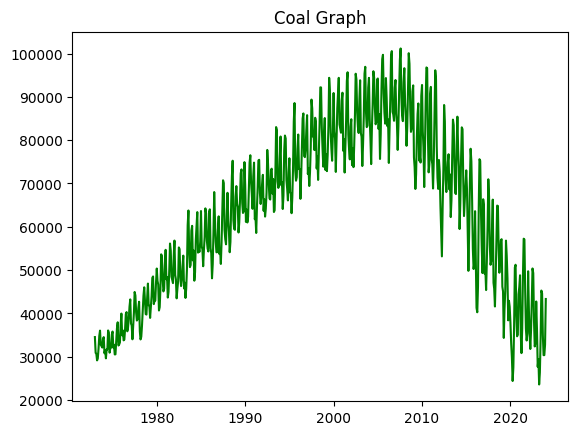

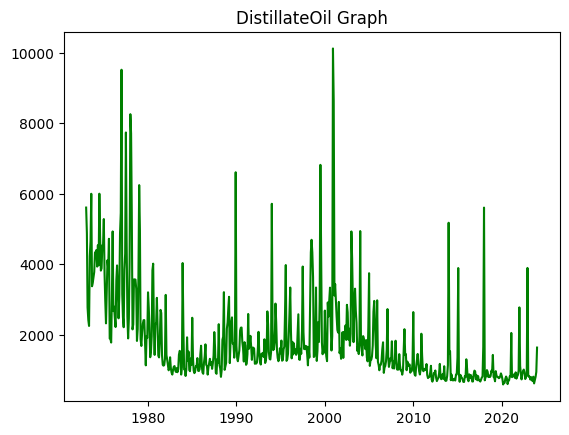

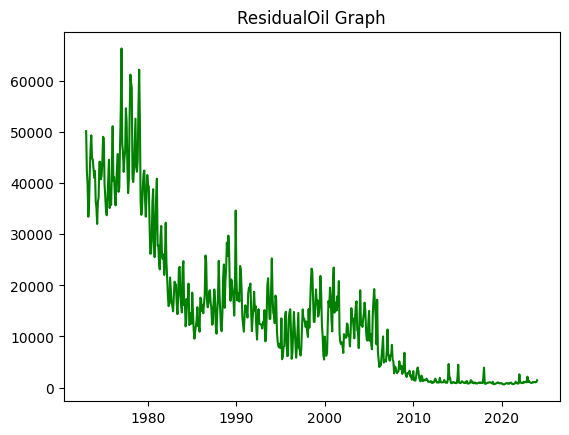

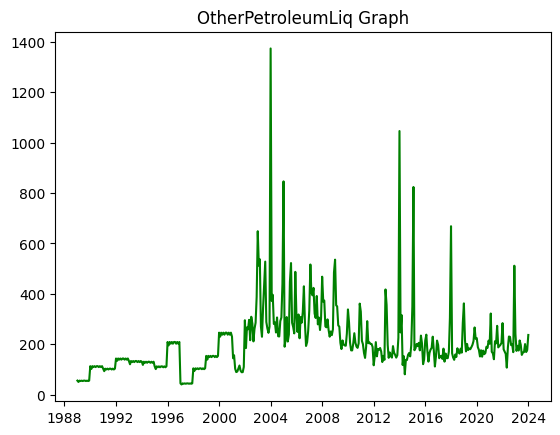

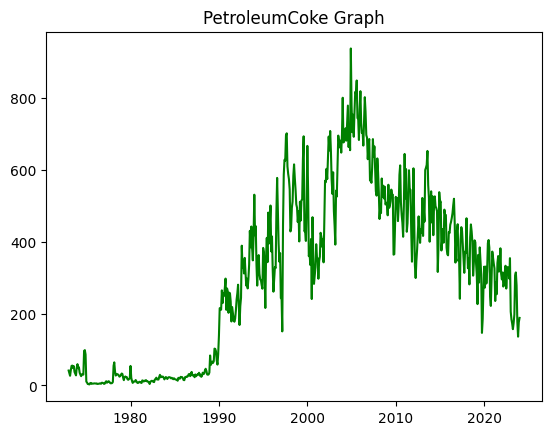

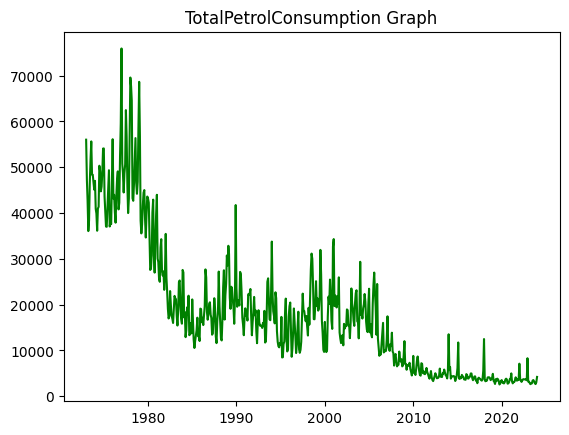

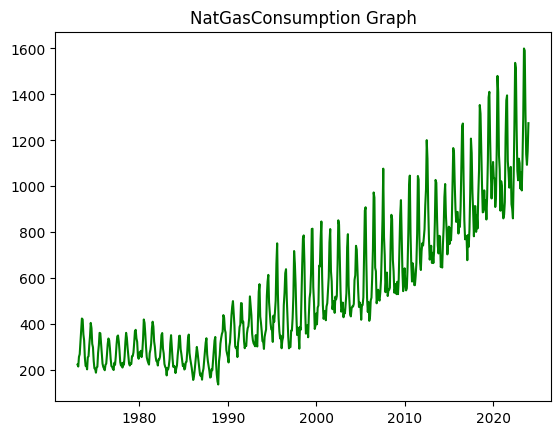

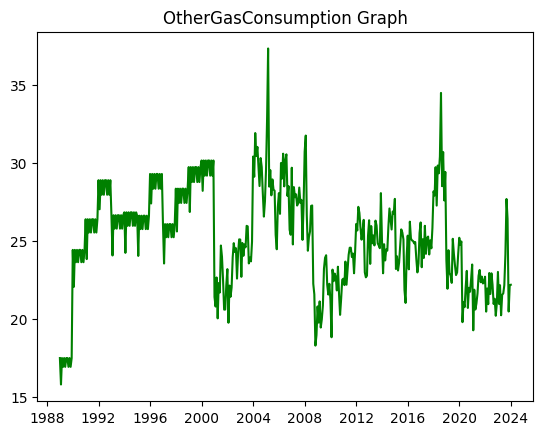

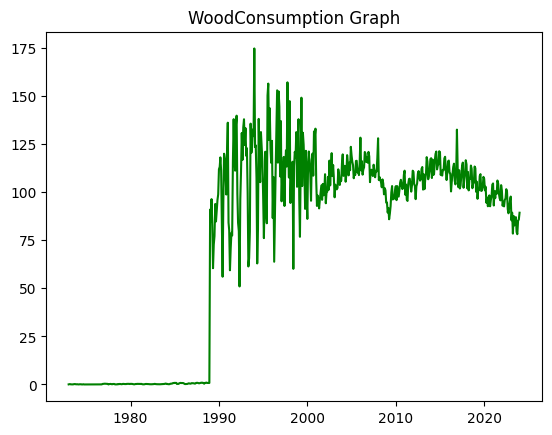

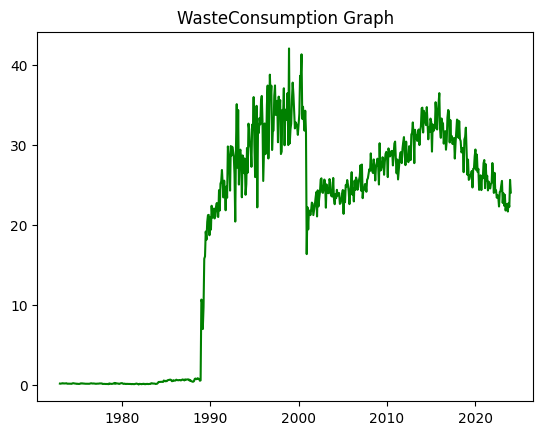

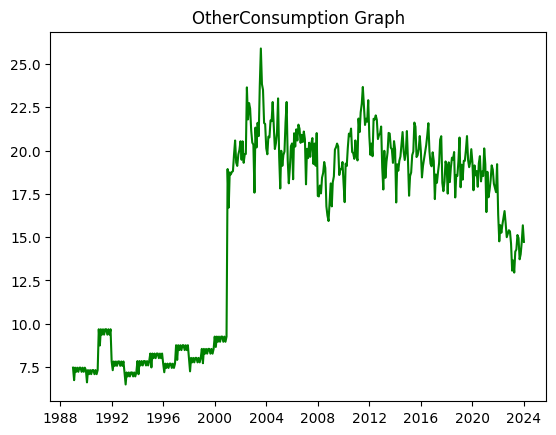

In [ ]:
for x in energydict.keys():
  energydict[x].replace('Not Available', np.nan, inplace = True)
  energydict[x].dropna(inplace = True)

  # plotting code
  plt.plot(energydict[x]['Month'], energydict[x][x], color = 'green')
  plt.title(x + " Graph")
  plt.show()

Good options for analyses seem to be coal and Natural Gas consumption.

In [ ]:
coal = energydict['Coal']
natgas = energydict['NatGasConsumption']